# Najboljši rumi 

V projektni nalogi sem zajela podatke vseh rumov na spletni strani https://www.rumratings.com/brands.
    

Zbrala sem naslednje podatke: 
    
        • ime ruma
        • drzava
        • stil
        • število slasov
        • cena
        • ocena
        
        
V nadaljevanju bom obravnavala odvisnost cene od države in stila, število rumov na državo, najbolje ocenjeni rumi, kateri rum bi bil najboljš nakup...

In [1]:
import pandas as pd
%matplotlib inline

pd.options.display.max_rows = 20

Za začetek si oglejmo vse podatke, zbrane v tabeli:

In [2]:
rumi = pd.read_csv('podatki.csv')
rumi

,Name,Country,Type,Ratings,Price_USD,Rating
0,Diplomatico Reserva Exclusiva,Venezuela,Aged,1235,38.64,8.1
1,Pyrat XO,Anguilla,Aged,655,23.73,6.3
2,Kraken Black Spiced,Trinidad,Spiced,757,17.3,6.2
3,Plantation XO 20th Anniversary,Caribbean,Aged,626,54.76,8.6
4,El Dorado 12-Year,Guyana,Aged,647,36.11,7.8
5,Bacardi Superior,Puerto Rico,Light,367,14.26,3.7
6,Ron Zacapa XO,Guatemala,Aged,431,94.8,8.8
7,Ron Zacapa 23 Solera,Guatemala,Aged,1108,50.7,7.7
8,Matusalem Gran Reserva 15-Year,Dominican Republic,Aged,368,28.93,6.4
9,El Dorado Special Reserve 15-Year,Guyana,Aged,479,52.61,8.1


In [3]:
#Ker je veliko rumov neocenjenih, mi to uniči analizo, zato se odločim da take vržem iz igre pri določenih analizah
rumi1 = rumi[rumi.Ratings > 0]
rumi1

,Name,Country,Type,Ratings,Price_USD,Rating
0,Diplomatico Reserva Exclusiva,Venezuela,Aged,1235,38.64,8.1
1,Pyrat XO,Anguilla,Aged,655,23.73,6.3
2,Kraken Black Spiced,Trinidad,Spiced,757,17.3,6.2
3,Plantation XO 20th Anniversary,Caribbean,Aged,626,54.76,8.6
4,El Dorado 12-Year,Guyana,Aged,647,36.11,7.8
5,Bacardi Superior,Puerto Rico,Light,367,14.26,3.7
6,Ron Zacapa XO,Guatemala,Aged,431,94.8,8.8
7,Ron Zacapa 23 Solera,Guatemala,Aged,1108,50.7,7.7
8,Matusalem Gran Reserva 15-Year,Dominican Republic,Aged,368,28.93,6.4
9,El Dorado Special Reserve 15-Year,Guyana,Aged,479,52.61,8.1


Najprej poglejmo, katerih stilov je največ:

In [27]:
rumi.groupby('Type').size().sort_values(ascending=False)

Type
Aged             1776
Gold              578
Light             477
Flavored          357
Spiced            218
Rhum Agricole     159
Dark              145
Overproof          76
Cachaca            53
n/a                42
dtype: int64

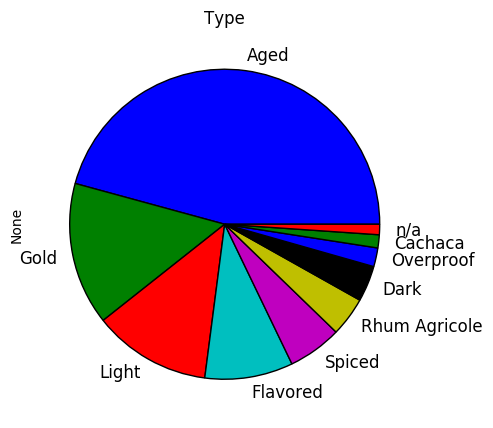

In [35]:
rumi.groupby('Type').size().sort_values(ascending=False).plot(kind='pie', figsize=(5, 5), fontsize=12, title='Type')

Največ jih je torej staranih.
Od kje pa prihaja največ rumov?

In [32]:
rumi.groupby('Country').size().sort_values(ascending=False)

Country
USA                   419
Caribbean             389
Martinique            274
Dominican Republic    193
Guadeloupe            146
UK                    128
Cuba                  123
Puerto Rico           116
Barbados              115
Guyana                102
                     ... 
Rwanda                  1
Portugal                1
Combination             1
Mexique                 1
London                  1
Hungary                 1
Guyane                  1
French Guyana           1
France / Cuba           1
usa                     1
dtype: int64

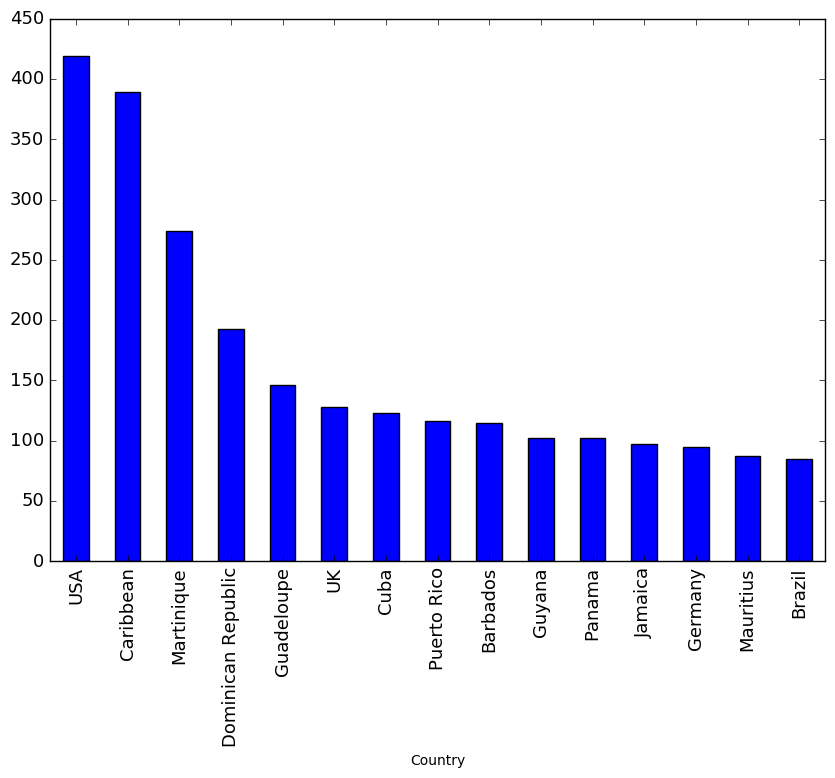

In [30]:
rumi.groupby('Country').size().sort_values(ascending=False)[rumi.groupby('Country').size()>80].plot(kind='bar', figsize = (10, 7), fontsize = 13)

Kot lahko vidimo na zgornjem grafu, jih je največ iz Združenih držav Amerike.

Sedaj lahko pogledamo, kateri stili so v posameznih državah najbolj priljubljeni.

In [33]:
rumi.groupby(['Country', 'Type']).size().sort_values(ascending=False)

Country             Type         
Caribbean           Aged             291
Martinique          Aged             140
Dominican Republic  Aged             111
USA                 Light            107
Guadeloupe          Aged              89
USA                 Gold              87
UK                  Aged              83
Martinique          Rhum Agricole     82
USA                 Spiced            80
Guyana              Aged              68
                                    ... 
Curacao             Dark               1
                    Gold               1
                    Light              1
                    Spiced             1
Paraguay            Rhum Agricole      1
                    Aged               1
Czech Republic      n/a                1
Nicaragua           Flavored           1
Newfoundland        Spiced             1
usa                 Spiced             1
dtype: int64

In [9]:
# po oceni razporejeni rumi
rumi[['Name','Country', 'Rating']].sort_values('Rating', ascending=False)

,Name,Country,Rating
3699,Bohemio Honey,Panama,10.0
399,UF30E Uitvlugt 1990,Guyana,10.0
3062,UF30E 1985,Guyana,10.0
723,Punta Cana Silver Dry,Dominican Republic,10.0
3660,Hercules Superior XXX White,India,10.0
3662,Karukera Single Cask Sauternes,Guadeloupe,10.0
711,Rum Nation Demerara 1989 23-Year,Italy,10.0
3601,Barbancourt Cuvee 150 Ans,Haiti,10.0
681,Rumson's Coffee,USA,10.0
3758,"UF30E Diamond 1999 64,7%",Guyana,10.0


Sedaj lahko pogledamo, kako so v povprečju rumi ocenjeni v posameznih državah.

In [40]:
rating=rumi.groupby('Country')[['Rating']].mean().sort_values('Rating', ascending=False)
rating

,Rating
Country,
British Virgin Islands,10.000000
Switzerland,9.000000
Belgium,8.083333
Western Australia,8.000000
Portugal,8.000000
Multiple,7.942857
British Virgin Isles,7.853333
French Guyana,7.800000
Honduras,7.460000


V oči mi pade ocena vodilnega ruma, zato preverim kaj se je utegnilo zgoditi, da je tako dobro ocenjen.

In [42]:
rumi[rumi['Country'] == 'British Virgin Islands']

,Name,Country,Type,Ratings,Price_USD,Rating
535,Sebastian's Sebastian's,British Virgin Islands,Spiced,1,None,10.0


In res, kot lahko vidim, rum Sebastian's Sebastian's je bil ocenjen z 10, a je prejel le en glas. Zato zgornja tabela ni najbolj primerna za določitev, katera država je najboljša v pridelavi ruma.

Lahko pa preverim, kateri rum prejme največ glasov in je na koncu najbolje ocenjen.

In [67]:
# najprej uredi padajoče po številu glasov, pri vsaki pa še padajoče po oceni...NAJBOLJSI RUM, najbolsa ocena in najvec glasov!!!
tabela2 = rumi1[['Name','Country','Rating', 'Ratings']].sort_values(['Ratings', 'Rating'], ascending=[False, False])
tabela2

,Name,Country,Rating,Ratings
0,Diplomatico Reserva Exclusiva,Venezuela,8.1,1235
7,Ron Zacapa 23 Solera,Guatemala,7.7,1108
2,Kraken Black Spiced,Trinidad,6.2,757
1,Pyrat XO,Anguilla,6.3,655
4,El Dorado 12-Year,Guyana,7.8,647
3,Plantation XO 20th Anniversary,Caribbean,8.6,626
9,El Dorado Special Reserve 15-Year,Guyana,8.1,479
17,Havana Club 7-Year,Cuba,6.4,473
6,Ron Zacapa XO,Guatemala,8.8,431
10,Zaya Gran Reserva 12-Year,Trinidad,7.5,425


Kot lahko vidimo, najbolje ocenjen rum je Diplomatico Reserva Exclusiva (Venezuela), ki je prejel 1235 glasov in ima oceno 8,1.

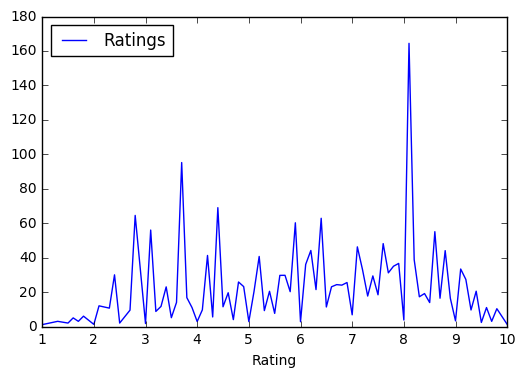

In [47]:
tabela2.groupby('Rating').mean().plot()

Nekateri rumi nimajo podane cene, zato jih bom v prihodnje obravnavala le tiste, ki ceno imajo.

In [48]:
popravljene_cene = rumi_s_ceno[['Price_USD']].apply(pd.to_numeric)
rumi_s_ceno = rumi_s_ceno.assign(Price_USD = popravljene_cene)
rumi_s_ceno

,Name,Country,Type,Ratings,Price_USD,Rating
0,Diplomatico Reserva Exclusiva,Venezuela,Aged,1235,38.64,8.1
1,Pyrat XO,Anguilla,Aged,655,23.73,6.3
2,Kraken Black Spiced,Trinidad,Spiced,757,17.30,6.2
3,Plantation XO 20th Anniversary,Caribbean,Aged,626,54.76,8.6
4,El Dorado 12-Year,Guyana,Aged,647,36.11,7.8
5,Bacardi Superior,Puerto Rico,Light,367,14.26,3.7
6,Ron Zacapa XO,Guatemala,Aged,431,94.80,8.8
7,Ron Zacapa 23 Solera,Guatemala,Aged,1108,50.70,7.7
8,Matusalem Gran Reserva 15-Year,Dominican Republic,Aged,368,28.93,6.4
9,El Dorado Special Reserve 15-Year,Guyana,Aged,479,52.61,8.1


Zgolj iz radovednosti želim preverit, ali se cena ruma res povečuje z boljšo oceno. Spodnji graf pa mi to potrdi. 

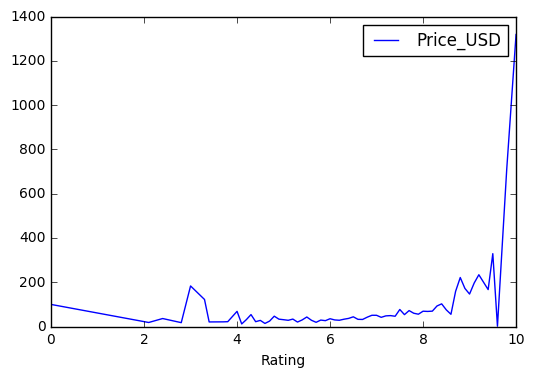

In [55]:
rumi_s_ceno.groupby('Rating').mean().plot(y = 'Price_USD')

Iz zgornjega grafa vidim tudi, da so nekatere cene rumov visoke, in me zanima, od kod prihajajo najdražji rumi.

In [58]:
rumi_s_ceno[['Name','Country', 'Price_USD']].sort_values(by =('Price_USD'),ascending = (False))

,Name,Country,Price_USD
3787,Santiago de Cuba 500,Cuba,4771.33
1050,Edmundo Dantes 25-Year,Cuba,1126.52
3878,Saint James Cuvee 250th Anniversary,Martinique,1120.57
1137,Neisson 21-Year,Martinique,1118.24
1059,Clement Rhum vieux Millesime 1952,Martinique,1108.43
1760,Chantal Comte Plantation de la Montagne Pelee XO,France,921.85
1817,El Dorado Millenium 25,Guyana,713.82
2793,Clement Rhum vieux Millesime 1970,Martinique,710.45
935,Neisson 15-Year,Martinique,627.00
1966,Havana Club Union,Cuba,428.10


Najvišje v tabeli je rum:

In [62]:
rumi[rumi['Price_USD'] == '4771.33']

,Name,Country,Type,Ratings,Price_USD,Rating
3787,Santiago de Cuba 500,Cuba,Aged,1,4771.33,10.0


Poglejmo si še, kako so povprečne ocene ter cena odvisni od stila.

In [66]:
rumi_s_ceno.groupby('Type')[['Rating','Price_USD']].mean().sort_values('Rating', ascending=False)

,Rating,Price_USD
Type,,
Aged,6.503325,97.400486
Rhum Agricole,6.272414,77.261034
Overproof,6.086667,37.307333
Spiced,5.907143,34.156071
Dark,5.772222,28.454444
Cachaca,5.500000,33.030000
Gold,5.255285,31.849431
Light,4.119444,50.286389
Flavored,3.930303,28.841212


Na koncu pa me zanima, kateri rum bi bil najboljši nakup. To bi pomenilo, da ima pri največjem številu glasov najboljšo oceno in ima temu ugodno ceno. 

In [73]:
rumi_s_ceno.sort_values(['Ratings','Rating','Price_USD'],ascending=[False,False,False])[:10]

,Name,Country,Type,Ratings,Price_USD,Rating
0,Diplomatico Reserva Exclusiva,Venezuela,Aged,1235,38.64,8.1
7,Ron Zacapa 23 Solera,Guatemala,Aged,1108,50.70,7.7
2,Kraken Black Spiced,Trinidad,Spiced,757,17.30,6.2
1,Pyrat XO,Anguilla,Aged,655,23.73,6.3
4,El Dorado 12-Year,Guyana,Aged,647,36.11,7.8
3,Plantation XO 20th Anniversary,Caribbean,Aged,626,54.76,8.6
9,El Dorado Special Reserve 15-Year,Guyana,Aged,479,52.61,8.1
17,Havana Club 7-Year,Cuba,Aged,473,25.00,6.4
6,Ron Zacapa XO,Guatemala,Aged,431,94.80,8.8
10,Zaya Gran Reserva 12-Year,Trinidad,Aged,425,30.99,7.5


Če želimo piti najboljši rum po najugodnješi ceni, potem nam zgornja tabela pove, kateri to je: